# Famous ImageNet deep neural network classifiers

# PART I

## Code base for PyImageSearch blogpost: ImageNet: VGGNet, ResNet, Inception, and Xception with Keras

Check the blogpost here: http://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

Code is slightly changed such a way that:
1. Need for OpenCV is eliminated
2. Code transforrmed from terminal application into Jupyter notebook

### Importing modules, setting up model

You may run this part once for setting up model. Replace model in the following line:

args = {'model': 'inception', }

You find models in MODELS dictionary right below.

In [1]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
# import cv2 # cv2 import removed from code

from matplotlib import pyplot as plt

# Argparse parts are removed from code. Argpars tools are for terminal applications
"""# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
    help="path to the input image")
ap.add_argument("-model", "--model", type=str, default="vgg16",
    help="name of pre-trained network to use")
args = vars(ap.parse_args())"""

args = {'model': 'vgg19', }

# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}
 
# esnure a valid model name was supplied via command line argument
if args["model"] not in MODELS.keys():
    print('Error - model is not found in MODELS.keys!')
    raise AssertionError("The --model command line argument should "
    "be a key in the `MODELS` dictionary")


# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
 
# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if args["model"] in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input
    
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(args["model"]))
Network = MODELS[args["model"]]
model = Network(weights="imagenet")
print("[INFO] model has ben set up.")

Using TensorFlow backend.


[INFO] loading vgg19...
[INFO] model has ben set up.


### You can check predictions with images

Image path can be set by modifing this line:

args['image'] = 'tank1.jpg'

[INFO] load and show image...


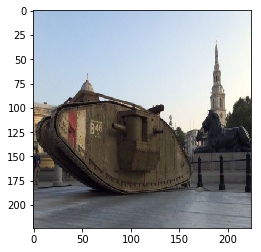

[INFO] pre-processing image...
[INFO] classifying image with 'vgg19'...
1. mosque: 36.95%
2. palace: 14.99%
3. monastery: 6.80%
4. dome: 4.08%
5. pirate: 3.16%
[INFO] finished.


In [2]:
from matplotlib import pyplot as plt

args['image'] = 'tank1.jpg'
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] load and show image...")
image = load_img(args["image"], target_size=inputShape)
plt.imshow(image)
plt.show()


print("[INFO] pre-processing image...")
image = img_to_array(image)

# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through thenetwork
image = np.expand_dims(image, axis=0)
 
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

# classify the image
print("[INFO] classifying image with '{}'...".format(args["model"]))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))


"""# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread(args["image"])
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
cv2.imshow("Classification", orig)
cv2.waitKey(0)"""
# This part of code is removed. Need for OpenCV is eliminated.

print('[INFO] finished.')

In [3]:
# Compare summary with code base.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# PART II

## Famous ImageNet classifiers

ImageNet classifiers can be found here, you can digest NN structure by overviewing code base:

https://github.com/fchollet/keras/tree/master/keras/applications

Core literature references can be found in codes; listed below:
- VGG16 and VGG19: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
- Inception V3: [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)
- ResNet50: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)
- Xception: [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)


### Inception

- "Although increased model size and com-
putational cost tend to translate to immediate quality gains
for most tasks (as long as enough labeled data is provided
for training),  computational efficiency and low parameter
count are still enabling factors for various use cases such as
mobile vision and big-data scenarios.  Here we are explor-
ing ways to scale up networks in ways that aim at utilizing
the added computation as efficiently as possible by suitably
factorized convolutions and aggressive regularization."

- "General Design Principles: Avoid representational bottlenecks, especially early in
the  network. [...] Higher dimensional representations are easier to pro-
cess locally within a network. [...] Spatial  aggregation  can  be  done  over  lower  dimen-
sional  embeddings  without  much  or  any  loss  in  rep-
resentational power. [...] Balance the width and depth of the network."

- Costly convolutions (5X5, 7X7) are replaced by series of chepaer ones (5X5 -> 3X3 + 3X3, 7X7 -> 1X7 + 7X1). The latter is like spatial separation, though there is activations in between. This case it is beneficial, according to Principle "Higher dimensional representations are easier to process locally within a network."

- "Efficient Grid Size Reduction". Traditioanlly, spatial dimension is reduced by pooling. Prior to it, channel dimension is increased, avoiding bottleneck. It is computionally costly. Instead, Inception applies parallel strieds of Pooling and Convolution.


### ResNet50

- "Driven by the significance of depth, a question arises: Is
learning better networks as easy as stacking more layers?
An obstacle to answering this question was __the notorious
problem  of  vanishing/exploding  gradients__  [1,  9],  which
hamper  convergence  from  the  beginning.   This  problem,
however, has been largely __addressed by normalized initial-
ization [23, 9, 37, 13] and intermediate normalization layers__
[16], which enable networks with tens of layers to start con-
verging  for  stochastic  gradient  descent  (SGD)  with  back-
propagation [22]."

- "When  deeper  networks  are  able  to  start  converging,  a
__degradation
problem__has been exposed:  with the network
depth increasing, accuracy gets saturated (which might be
unsurprising)  and  then  degrades  rapidly.
Unexpectedly,
such degradation is
not caused by overfitting
,  and adding
more layers to a suitably deep model leads to
higher train-
ing error
, as reported in [11, 42] and thoroughly verified by
our experiments. Fig. 1 shows a typical example. [...] In  this  paper,  we  address  the  degradation  problem  by
introducing  a
deep  residual  learning
framework."

- "he  degradation  problem  suggests  that  the  solvers
might have difficulties in approximating identity mappings
by multiple nonlinear layers. With the residual learning re-
formulation,  if identity mappings are optimal,  the solvers
may simply drive the weights of the multiple nonlinear lay-
ers toward zero to approach identity mappings.
In real cases, it is unlikely that identity mappings are op-
timal, but our reformulation may help to precondition the
problem.   If  the  optimal  function  is  closer  to  an  identity
mapping than to a zero mapping, it should be easier for the
solver to find the perturbations with reference to an identity
mapping, than to learn the function as a new one. We show
by experiments (Fig. 7) that the learned residual functions in
general have small responses, suggesting that identity map-
pings provide reasonable preconditioning."

- "We present successfully trained models on this dataset with
over 100 layers, and explore models with over 1000 layers."

- "Exper-
iments in this paper involve a function F that has two or
three layers (Fig. 5), while more layers are possible.  But if F has only a single layer, Eqn.(1) is similar to a linear layer:  y =  W1*x + x for which we have not observed advantages"

- "It is worth noticing that our model has
fewer
filters and
lower
complexity than VGG nets [41] (Fig. 3, left). Our 34-
layer baseline has 3.6 billion FLOPs (multiply-adds), which
is only 18% of VGG-19 (19.6 billion FLOPs)."

- "Bottleneck design"

### Xception

- " the typical Inception module first looks at cross-
channel correlations via a set of 1x1 convolutions, mapping
the input data into 3 or 4 separate spaces that are smaller than
the original input space, and then maps all correlations in
these smaller 3D spaces, via regular 3x3 or 5x5 convolutions.
This is illustrated in figure 1. In effect, the fundamental hy-
pothesis behind Inception is that cross-channel correlations
and spatial correlations are sufficiently decoupled that it is
preferable not to map them jointly
1
."

- "A depthwise separable convolution,  commonly called
“separable convolution” in deep learning frameworks such as
TensorFlow and Keras, consists in a
depthwise convolution
,
i.e. a spatial convolution performed independently over each
channel of an input, followed by a
pointwise convolution
,
i.e. a 1x1 convolution, projecting the channels output by the
depthwise convolution onto a new channel space.  This is
not to be confused with a spatially separable convolution,
which is also commonly called “separable convolution” in
the image processing community."

- Note that besides replacing Inception modules with depthwise separable convolutions, residual connections and identity mappings are also part of the model similarly to ResNet50.

# PART III

### Transferring filters of VGG19

Now it is assumed that model is set to be VGG19 in the first code part

In [ ]:
# You can check the dimensionality of weight matrices for the filters
num_layer = 2 # Set layer number here!
weights=model.layers[num_layer].get_weights()
print(weights[0].shape)

In [ ]:
from keras import backend as K

# Check data format!
print(K.image_data_format())

In [4]:
# Creating two models, namely model_transfer_first_layer and model_transfer_first_two_layers

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Activation

# rewrite input shape here!
inp = Input(shape=(inputShape[0], inputShape[1], 3)) # channels_last format

x = Conv2D(64, (3, 3), padding='same', name='block1_conv1',
           weights=model.layers[1].get_weights())(inp)

model_transfer_first_layer = Model(inp, x, name='transfer_first_layer')

x = Activation('relu')(x)

x = Conv2D(64, (3, 3), padding='same', name='block1_conv2',
           weights=model.layers[2].get_weights())(x)

model_transfer_first_two_layers = Model(inp, x, name='transfer_first_two_layers')

# x = Activation('relu')(x)


In [5]:
# Loading and pre-porcessing image 

img_path = 'tank1.jpg'
img = load_img(img_path, target_size=inputShape)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

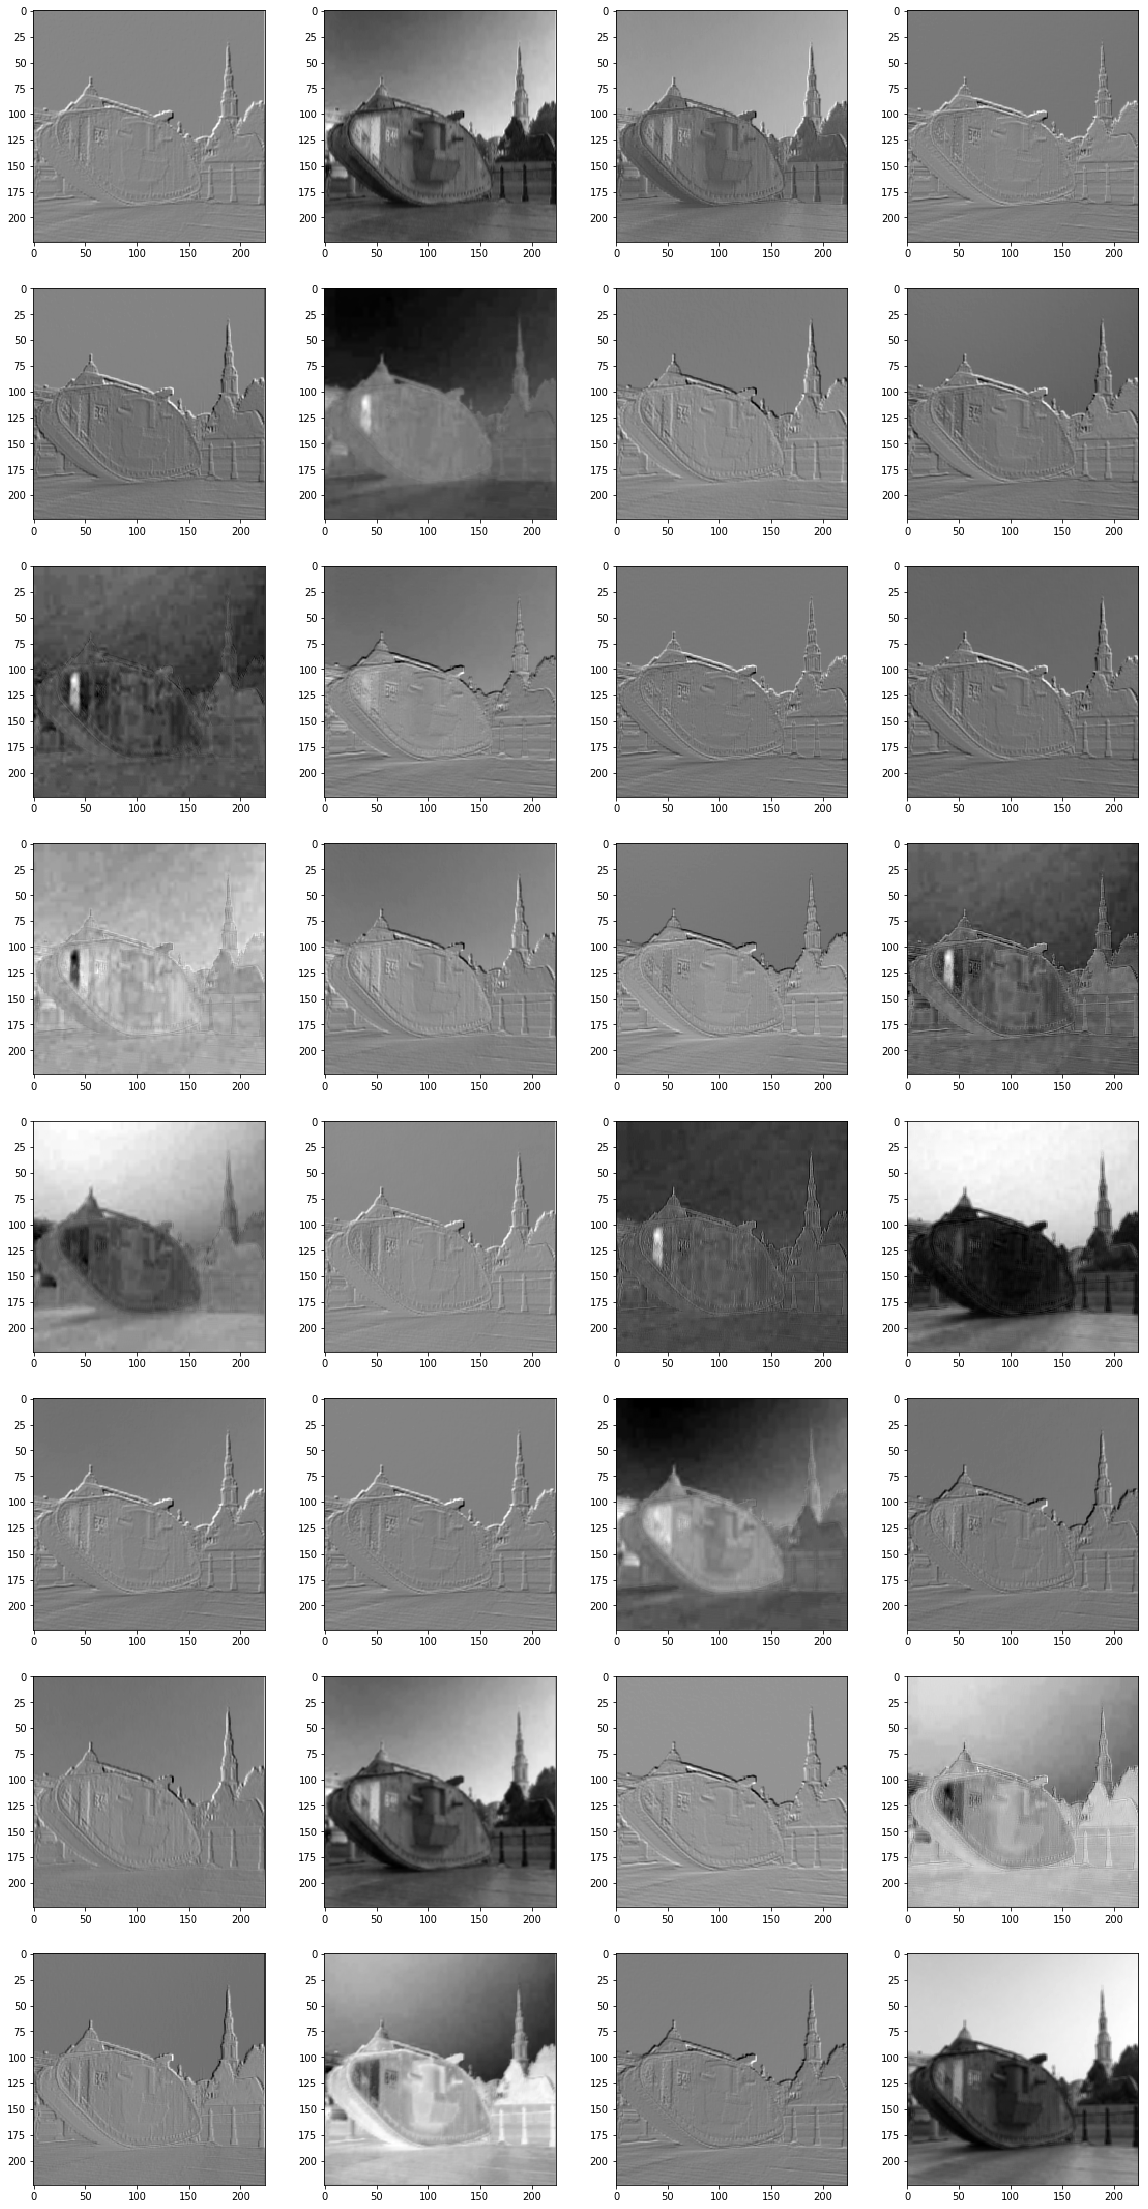

In [8]:
# Digesting image with model_transfer_first_layer

preds = model_transfer_first_layer.predict(x)

f, axarr = plt.subplots(8, 4, figsize = (20,40))

for i in range(8):
    for j in range(4):
        filt = i*4 + j
        
        axarr[i, j].imshow(preds[0, :, :, filt], 'gray')

plt.show()

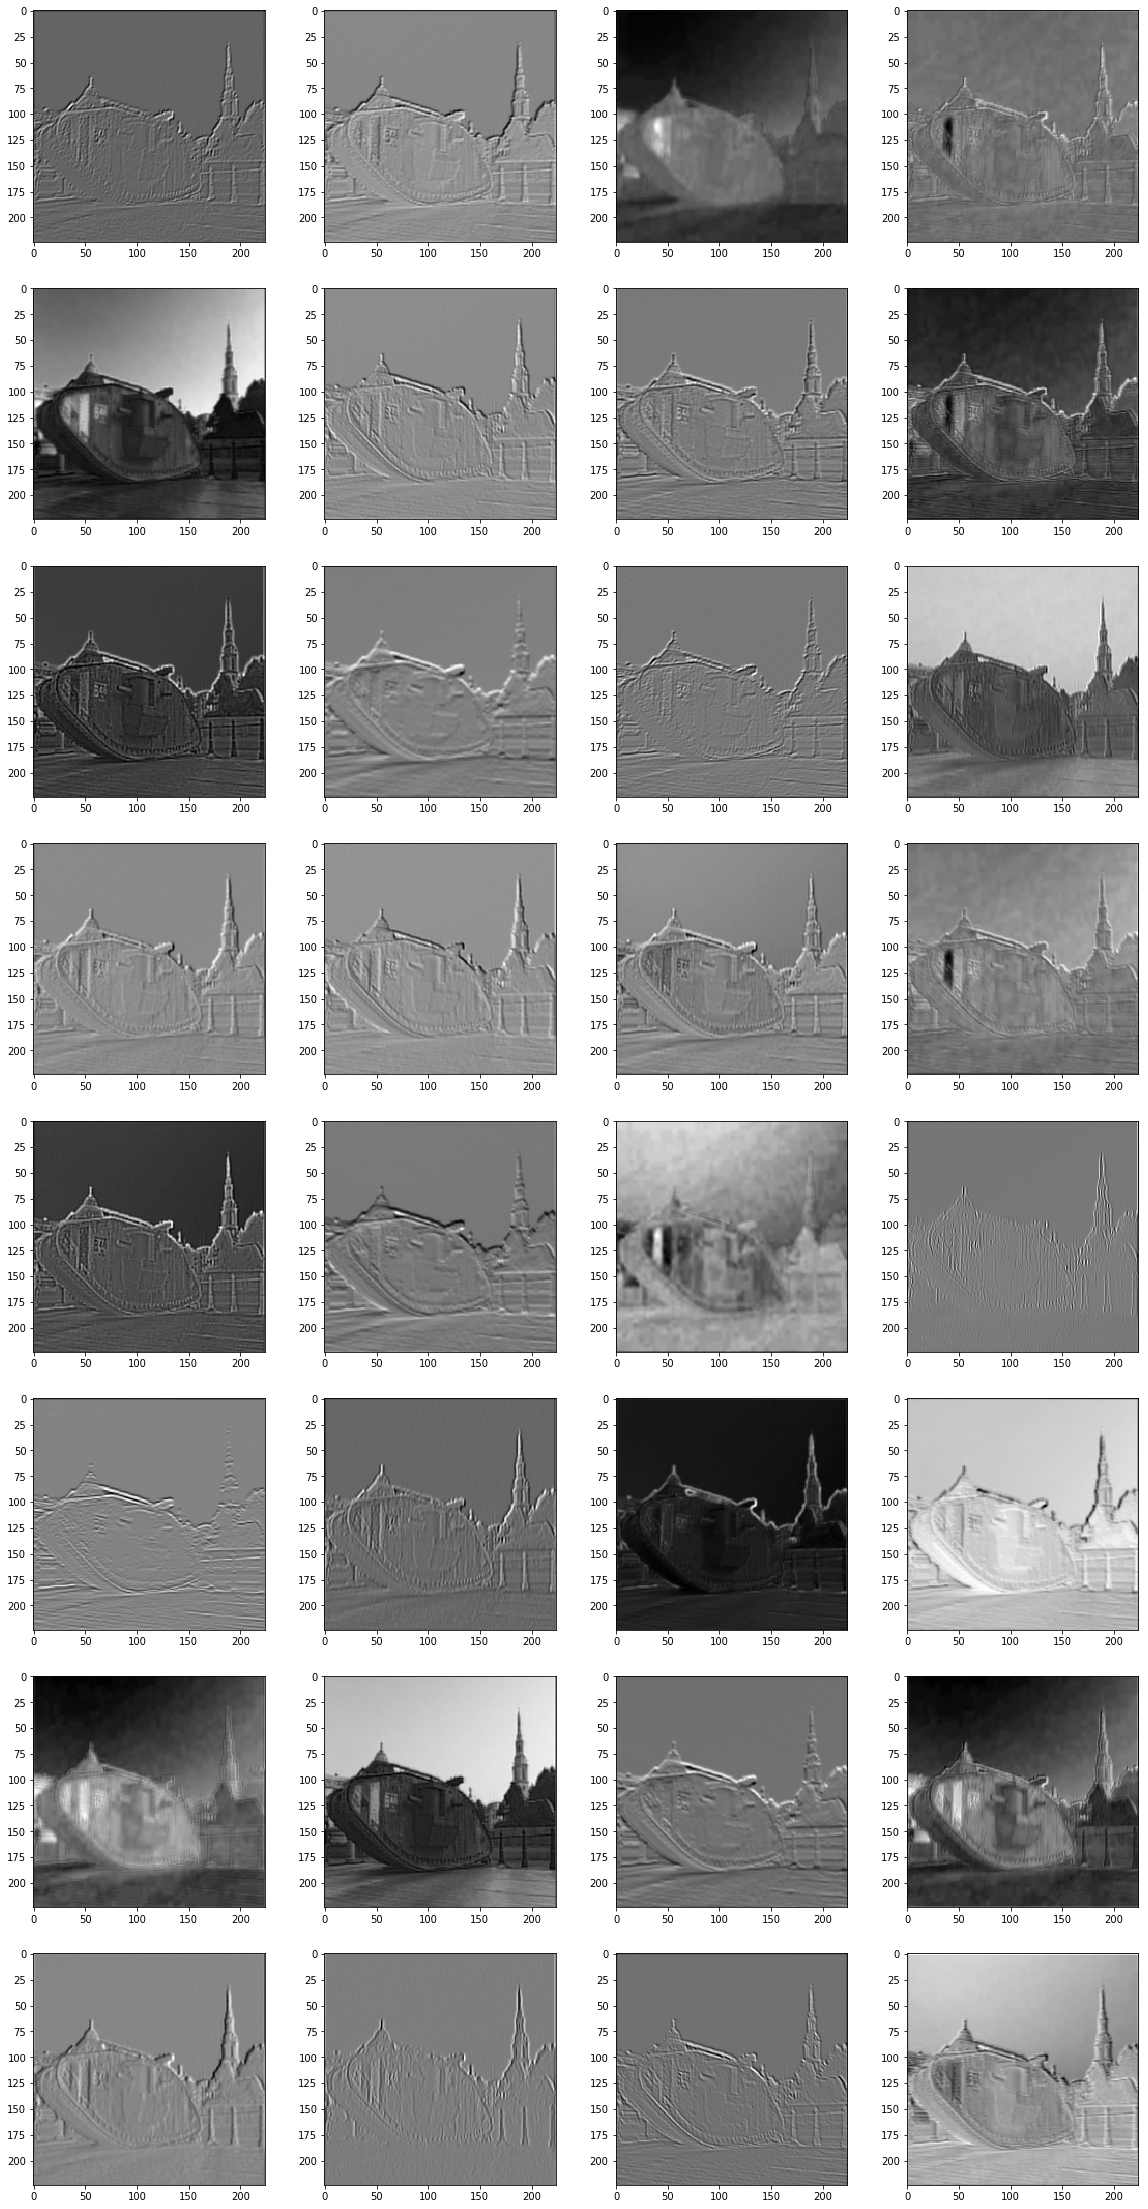

In [9]:
# Digesting image with model_transfer_first_two_layers

preds = model_transfer_first_two_layers.predict(x)

f, axarr = plt.subplots(8, 4, figsize = (20,40))

for i in range(8):
    for j in range(4):
        filt = i*4 + j
        
        axarr[i, j].imshow(preds[0, :, :, filt], 'gray')

plt.show()